## **Dataset 3: Laptop Price Dataset April 2024**

---

 This dataset contains detailed information on laptops available in the market as of April 2024, taken from eBay using a web API. It consists of listings for both new and secondhand (refurbished or pre-owned) laptops. The dataset contains 3,981 rows and 10 columns, providing a diverse range of laptop specifications, pricing, and conditions.

---


### Step 1: Data Cleaning
---
In this step, we clean the dataset by performing various operations to ensure it is ready for analysis. These operations include removing duplicates, handling missing values, standardizing string columns, and ensuring proper data types.

1. **Remove Duplicates**: 
   We removed duplicate rows to ensure each laptop listing is unique.

2. **Handle Missing Values**:
   - For string columns, we replace missing values with 'unknown'.
   - For numeric columns, we replace missing values using interpolation in this case since we handle values that change overtime and could have a specific trend

3. **Remove Fully Empty Rows**:
   We dropped rows where all columns were missing.

4. **Restrict RAM Range**:
   - We filtered rows to keep only laptops with RAM between 4GB and 64GB.
   - This step focuses the dataset on realistic, market-relevant laptops and removes extreme or erroneous values.

5. **Validate and Clean Data Types**:
   - We defined expected types for each key column (e.g., Brand → string, Price → float, RAM → int).
   - We converted each column to the correct type.

6. **Drop Rows Missing Required Columns**
   - We dropped rows where critical columns (Brand, Product_Description, Screen_Size, RAM, Processor, Price) were missing.

7. **Remove Outliers**
   - We used the IQR method to detect and remove outliers in Price and Screen_Size
---



In [2]:
#Cleaning of Dataset 3

from Data_Cleaner import DataCleaner

cleaner = DataCleaner()
cleaner.load_data("raw_ebay.csv")
cleaner.remove_duplicates()
cleaner.remove_all_null_rows()
cleaner.restrict_ram_range()


# Optional: validate and coerce types
expected_types = {
    'Brand': str,
    'Product_Description': str,
    'Screen_Size': float,
    'RAM': int,
    'Processor': str,
    'GPU': str,
    'GPU_Type': str,
    'Resolution': str,
    'Condition': str,
    'Price': float
}
cleaner.validate_and_clean_types(expected_types)
cleaner.drop_rows_with_missing(required_columns=['Brand', 'Product_Description', 'Screen_Size', 'RAM', 'Processor', 'Price'])

# Optional: outlier removal
cleaner.remove_outliers_iqr('Price')
cleaner.remove_outliers_iqr('Screen_Size')

cleaner.save_data("cleaned_dataset.csv")


Loaded data: (3981, 10)
Removed duplicates: 0 rows
Removed fully empty rows: 0 rows
Column 'RAM' is not numeric. Attempting to convert.
Filtered RAM to >=4 and <=64: 312 rows removed.
Validated and cleaned column: Brand -> <class 'str'>
Validated and cleaned column: Product_Description -> <class 'str'>
Validated and cleaned column: Screen_Size -> <class 'float'>
Validated and cleaned column: RAM -> <class 'int'>
Validated and cleaned column: Processor -> <class 'str'>
Validated and cleaned column: GPU -> <class 'str'>
Validated and cleaned column: GPU_Type -> <class 'str'>
Validated and cleaned column: Resolution -> <class 'str'>
Validated and cleaned column: Condition -> <class 'str'>
Validated and cleaned column: Price -> <class 'float'>
Dropped 331 rows with missing values in columns: ['Brand', 'Product_Description', 'Screen_Size', 'RAM', 'Processor', 'Price']
Removed outliers in 'Price': 0 rows removed
Removed outliers in 'Screen_Size': 29 rows removed
Saved cleaned data to 'cleane

### Step 2: Descriptive Statistics
---
### In this step, we calculate various descriptive statistics to summarize and understand the distribution of the data.
### Various measures of tendency are used to statistically analyze how each column is in this specific dataset.
---



=== Numerical Summary Statistics ===
          Screen_Size          RAM        Price
count     3309.000000  3309.000000  3309.000000
mean        14.631490    14.261710   528.855119
std          1.140676     9.095246   236.988142
min         12.000000     4.000000     0.000000
25%         14.000000     8.000000   334.190000
50%         14.000000    16.000000   499.990000
75%         15.600000    16.000000   700.820000
max         18.000000    64.000000   999.990000
median      14.000000    16.000000   499.990000
mode        14.000000    16.000000   499.990000
skew         0.226010     2.650800     0.226944
kurtosis    -0.535757    10.400712    -0.904785


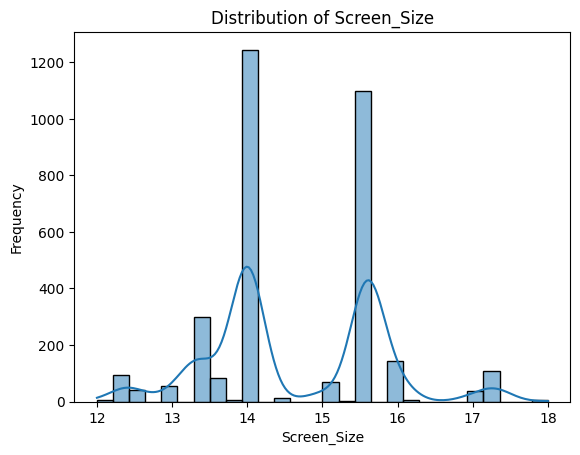

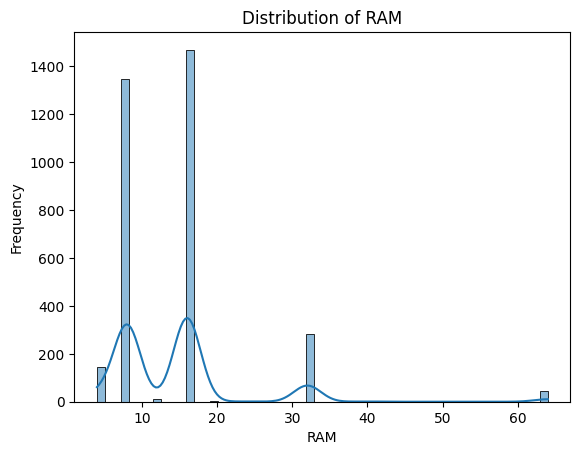

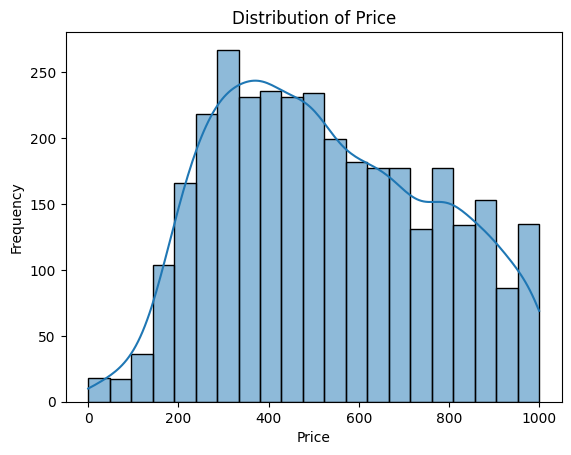


=== Frequency Tables for Categorical Features ===

Frequency table for 'Brand':
Brand
Dell                      1230
Lenovo                     671
HP                         644
Microsoft                  189
ASUS                       156
Acer                       114
MSI                         65
Samsung                     64
LG                          41
invalid                     25
LENOVO                      25
DELL                        22
Gateway                     17
MICROSOFT                    6
Apple                        5
Razer                        4
Asus                         4
Panasonic                    2
Intel                        2
Chuwi                        2
Alienware                    2
Sony                         2
GIGABYTE                     2
Microsoft Surface            1
Eurocom                      1
AORUS                        1
Hewlett Packard              1
AVITA                        1
Google                       1
Dell gaming ga

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')

# Summary statistics for numerical features
print("\n=== Numerical Summary Statistics ===")
describe_df = df.describe()
mean_df = df.mean(numeric_only=True)
median_df = df.median(numeric_only=True)
mode_df = df.mode().iloc[0]
std_df = df.std(numeric_only=True)
skew_df = df.skew(numeric_only=True)
kurt_df = df.kurtosis(numeric_only=True)

# Combine all into one summary table
summary_df = describe_df.copy()
summary_df.loc['mean'] = mean_df
summary_df.loc['median'] = median_df
summary_df.loc['mode'] = mode_df
summary_df.loc['std'] = std_df
summary_df.loc['skew'] = skew_df
summary_df.loc['kurtosis'] = kurt_df

print(summary_df)

# Visualize distributions of numerical features
for col in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Frequency tables for categorical features
print("\n=== Frequency Tables for Categorical Features ===")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nFrequency table for '{col}':")
    print(df[col].value_counts())
    print("\nPercentage:")
    print(df[col].value_counts(normalize=True) * 100)


### Detailed Distribution of Numerical Features

---

#### **1. Screen Size**

- **Count:** 3,309 laptops  
- **Mean (Average):** 14.63 inches  
- **Standard Deviation (Spread):** 1.14 inches  
- **Minimum:** 12 inches  
- **25th percentile (Q1):** 14 inches → 25% of laptops have screen sizes ≤ 14 inches  
- **Median (50th percentile):** 14 inches → half the laptops are ≤ 14 inches, half ≥ 14 inches  
- **75th percentile (Q3):** 15.6 inches → 75% of laptops have screen sizes ≤ 15.6 inches  
- **Maximum:** 18 inches  
- **Mode (Most common value):** 14 inches  
- **Skewness:** 0.23 → slight right skew, meaning a few laptops have larger screens than average  
- **Kurtosis:** -0.54 → slightly flat compared to a normal bell curve, indicating fewer extreme outliers

**Interpretation:**  
Most laptops in the dataset have a 14-inch screen, which is a common size for both portability and usability. The distribution is fairly symmetric, with only a slight tendency toward larger screen sizes (15.6–18 inches). There’s a narrow range overall, so most laptops fall within the standard 14–15.6 inch category.

---

#### **2. RAM (Memory)**

- **Count:** 3,309 laptops  
- **Mean:** 14.26 GB  
- **Standard Deviation:** 9.10 GB → relatively large, showing wide variability  
- **Minimum:** 4 GB → typically found in entry-level laptops  
- **25th percentile:** 8 GB → a common baseline for midrange systems  
- **Median:** 16 GB → half the laptops have ≥16 GB, suggesting the dataset leans toward high-spec machines  
- **75th percentile:** 16 GB → most laptops top out here, with only 25% exceeding it  
- **Maximum:** 64 GB → high-end, possibly gaming or workstation laptops  
- **Mode:** 16 GB → most frequently occurring RAM size  
- **Skewness:** 2.65 → strong right skew, meaning there’s a small but significant number of laptops with very high RAM  
- **Kurtosis:** 10.40 → leptokurtic, meaning the distribution has a sharp peak and heavy tails (more extreme high values than expected in a normal distribution)

**Interpretation:**  
RAM shows a strongly skewed distribution, with a concentration around 8–16 GB but a notable tail extending toward high-performance machines with up to 64 GB. The combination of high skewness and high kurtosis indicates that while most laptops cluster at standard levels, the dataset also includes a small subset of top-tier devices that dramatically increase variability.

---

#### **3. Price**

- **Count:** 3,309 laptops  
- **Mean:** \$528.86  
- **Standard Deviation:** \$236.99 → substantial spread in pricing  
- **Minimum:** \$0 → suspicious; likely indicates free items  
- **25th percentile:** \$334.19 → lower-priced laptops  
- **Median:** \$499.99 → half of the laptops cost ≤ \$500  
- **75th percentile:** \$700.82 → upper price range  
- **Maximum:** \$999.99 → top of the listed price range (possibly capped)  
- **Mode:** \$499.99 → most frequently occurring price point  
- **Skewness:** 0.23 → slight right skew; some more expensive laptops pull the average up  
- **Kurtosis:** -0.90 → platykurtic, meaning the distribution is flatter than a normal bell curve, with fewer extreme values

**Interpretation:**  
Prices center around \$500, making this a midrange dataset overall. There’s a slight right skew due to higher-end laptops, but the minimum value of \$0 is likely a free items. The relatively flat distribution (negative kurtosis) suggests prices are spread fairly evenly across the \$300–\$700 range, without sharp peaks or extreme outliers.

---

### Key Takeaways:

- **Screen Size:**  
  → Most laptops are clustered tightly around 14–15.6 inches, with little variation; this is the sweet spot between portability and usability.

- **RAM:**  
  → There’s a wide spread, with many machines at 8–16 GB, but a small group of high-spec laptops with up to 64 GB dramatically increases the skew and tails.

- **Price:**  
  → The price centered around \$500 that reflects a good spread across budget, midrange, and premium models. The slight right skew suggests a few expensive laptops, but overall, pricing is fairly stable.

---


### Step 3: Data Visualization

---

In this step, we create various visualizations to explore the data further.

### Univariate Analysis:

1. **Bar Plots**:  
   Bar plots will be used to visualize the frequency distribution of categorical features, such as 'Brand', 'Processor', 'GPU', 'GPU_Type', 'Resolution', and 'Condition', etc. This helps in understanding which brands, processors, or GPU types are most common in the dataset.

2. **Histograms**:  
   Histograms will be plotted for numerical features like 'Screen_Size', 'RAM', and 'Price' to explore the distribution of these variables (e.g., identifying popular screen sizes, RAM capacities, and price ranges).


### Bivariate Analysis:

1. **Correlation Heatmap**:  
   A correlation heatmap will be generated to visualize the relationships between numerical features, specifically 'Screen_Size', 'RAM', and 'Price'. This will show how strongly these features are correlated with each other.

2. **Scatter Plots**:  
   Scatter plots will be used to explore the relationships between 'Price' and other key numerical features like 'Screen_Size' and 'RAM' to identify trends or clusters.



=== Univariate Analysis ===

Histogram for 'Screen_Size':


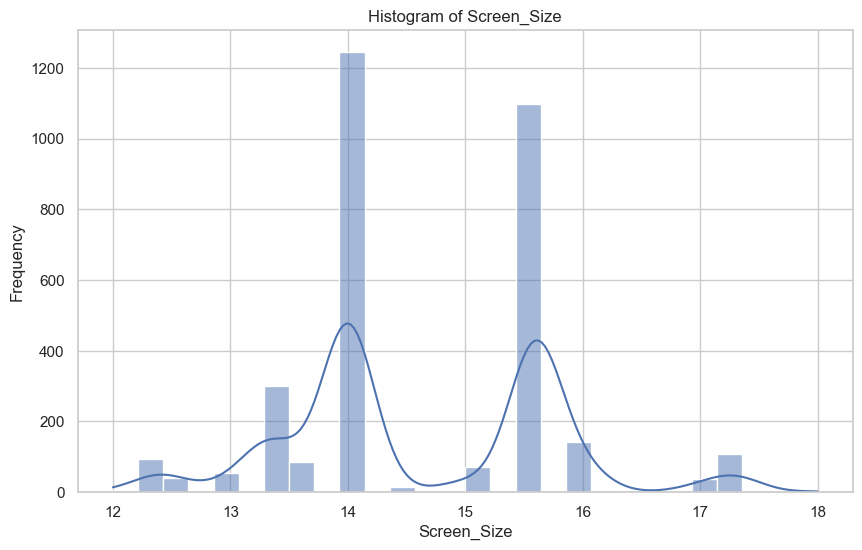


Histogram for 'RAM':


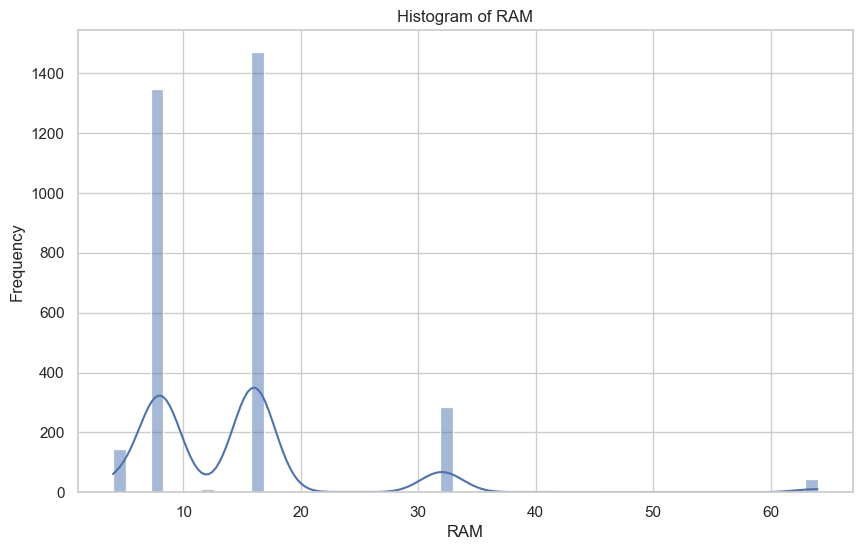


Histogram for 'Price':


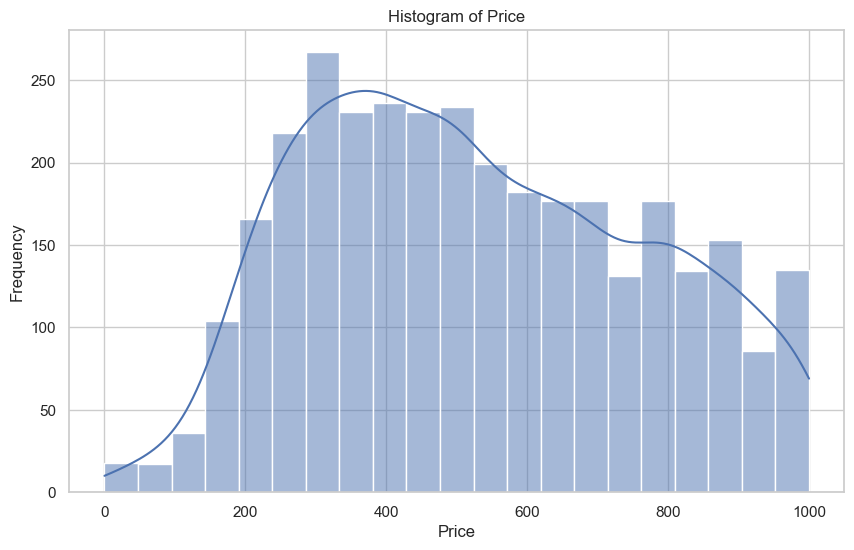


Bar Plot for 'Brand':


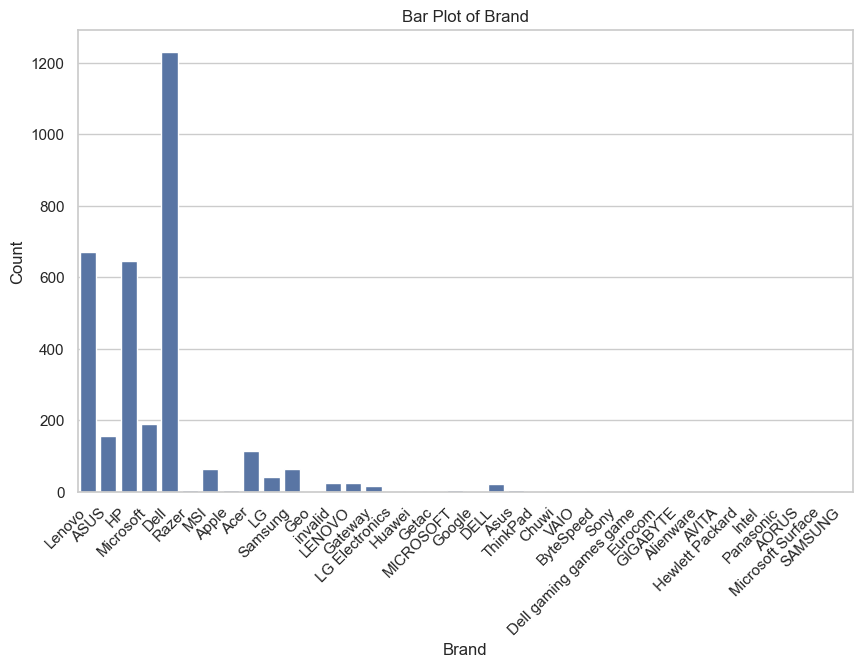


Bar Plot for 'Product_Description':


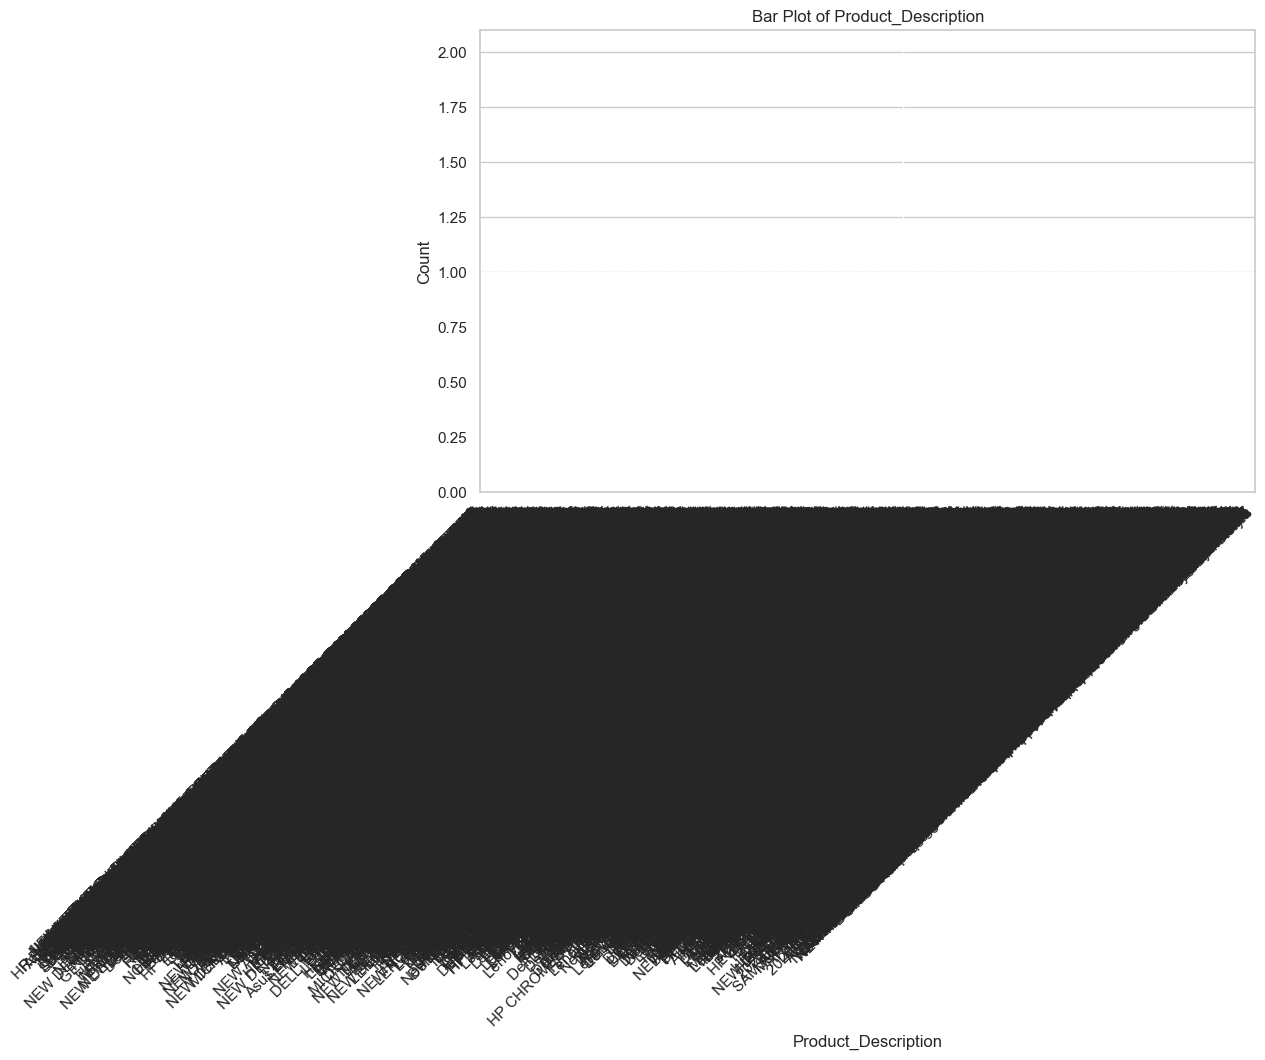


Bar Plot for 'Processor':


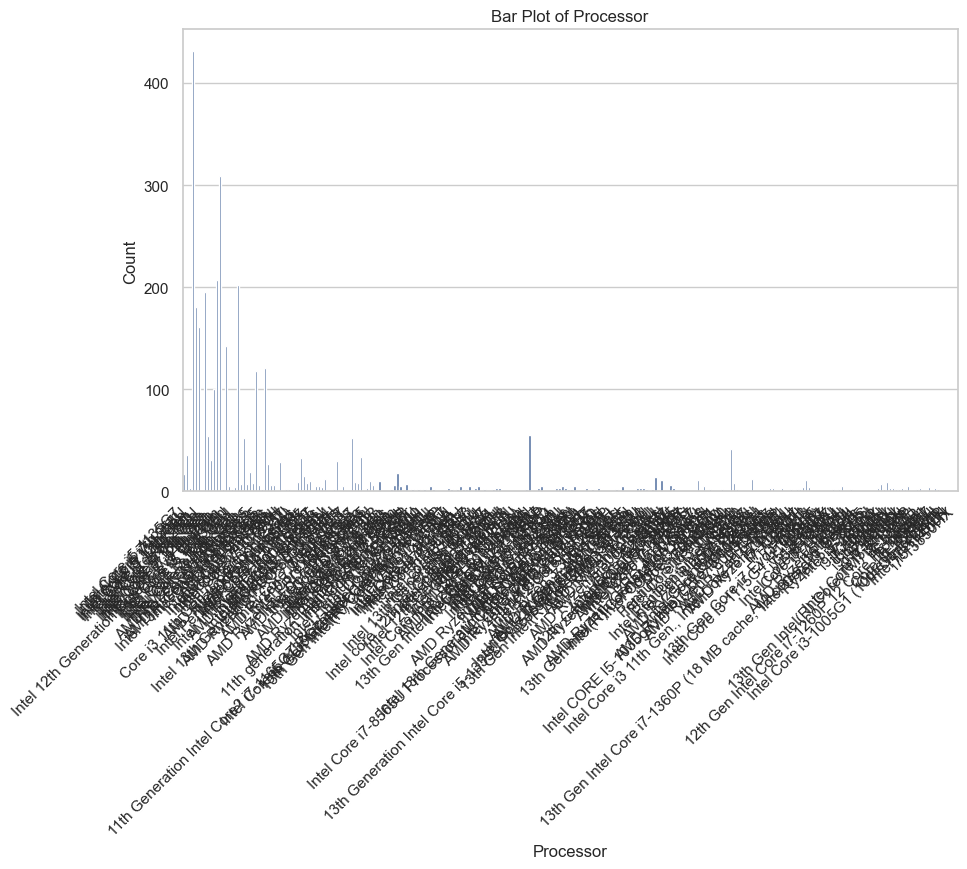


Bar Plot for 'GPU':


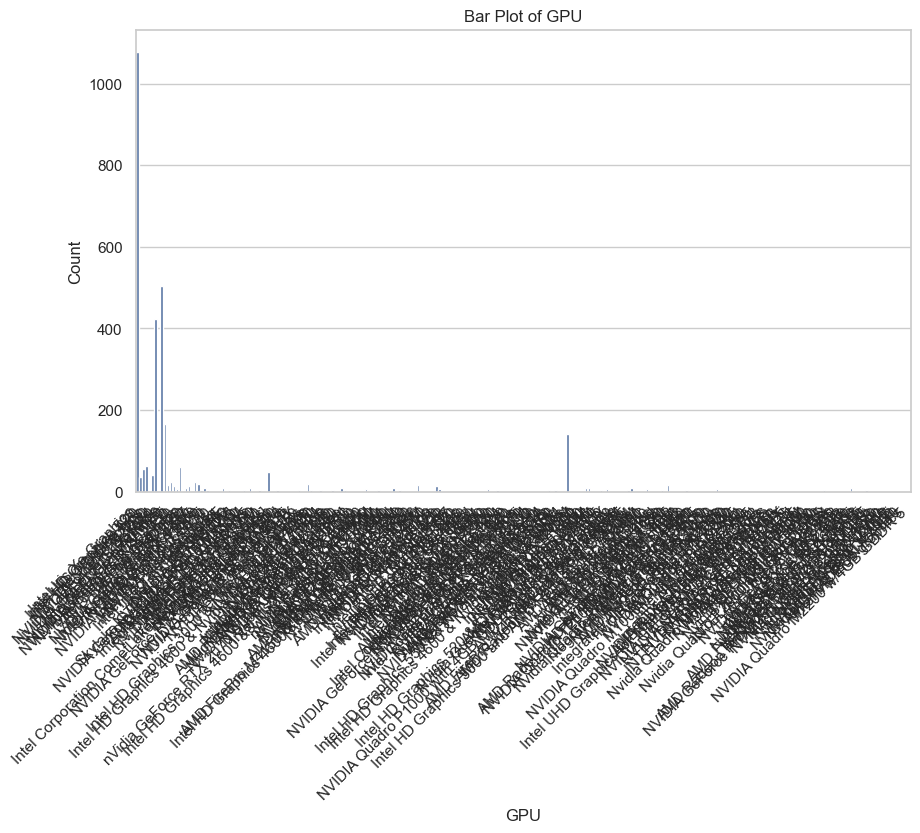


Bar Plot for 'GPU_Type':


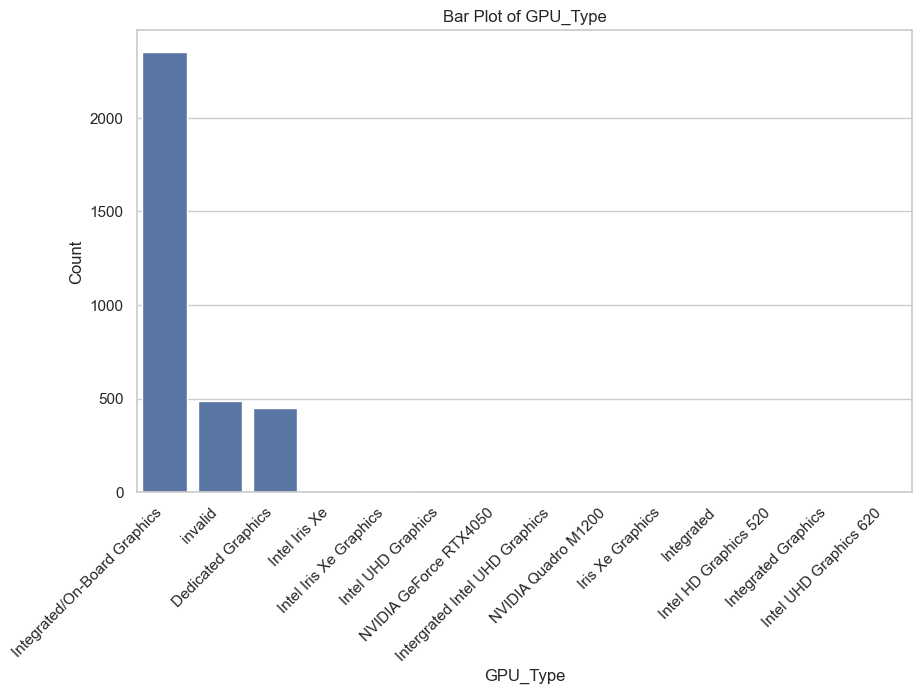


Bar Plot for 'Resolution':


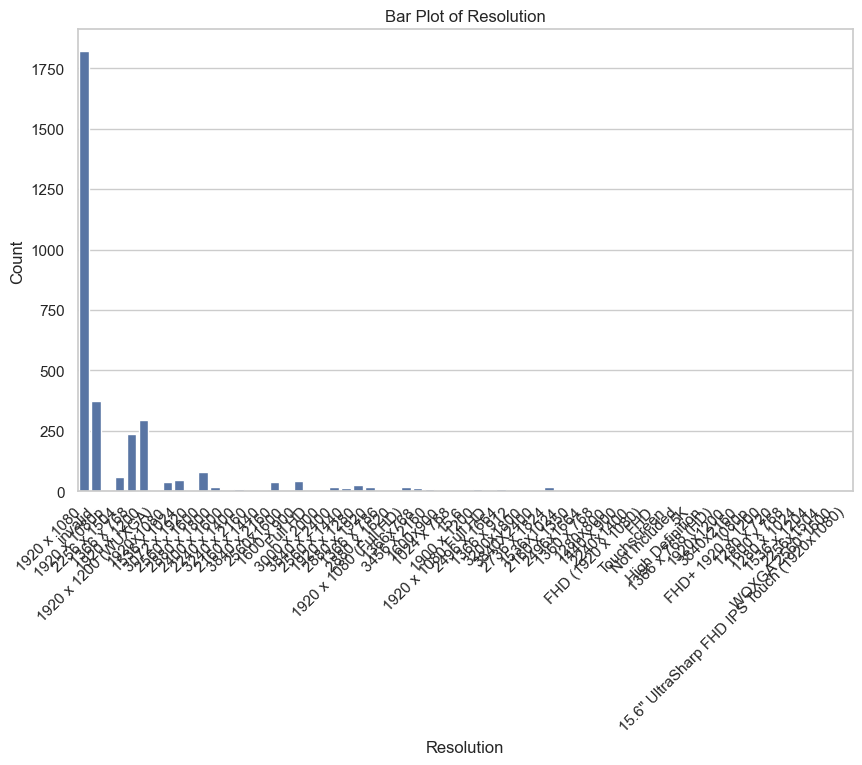


Bar Plot for 'Condition':


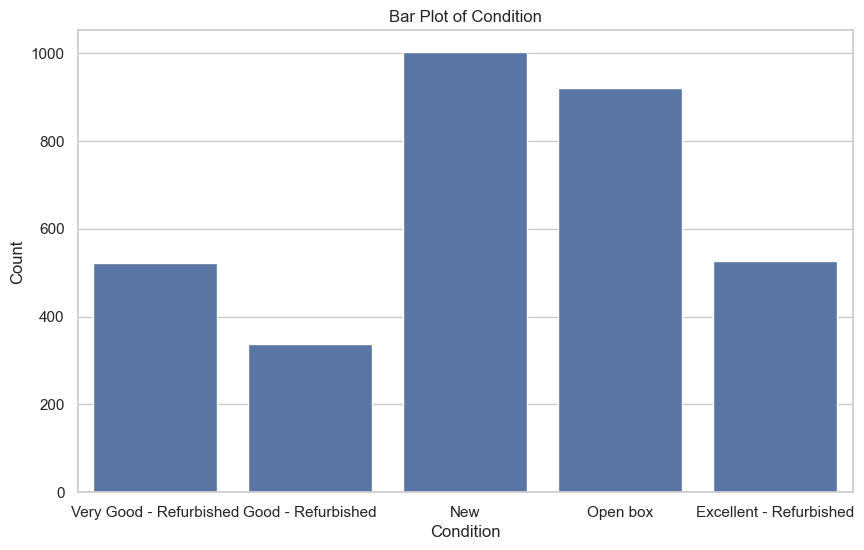

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

# Load dataset
df = pd.read_csv('cleaned_dataset.csv')

# Clean text columns
def clean_text(text):
    if isinstance(text, str):
        text = re.sub('\ufe0f', '', text) 
        text = re.sub(r'[^\x00-\x7F]+', '', text) 
    return text

for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].apply(clean_text)

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Suppress font warnings from matplotlib
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

print("\n=== Univariate Analysis ===")

# Numerical features: histograms
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    print(f"\nHistogram for '{col}':")
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Categorical features: bar plots 
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\nBar Plot for '{col}':")
    sns.countplot(x=df[col])
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Rotate x labels if there are too many
    if df[col].nunique() > 5:
        plt.xticks(rotation=45, ha='right')
    plt.show()



=== Bivariate Analysis ===

Scatter Plot between 'Screen_Size' and 'RAM':


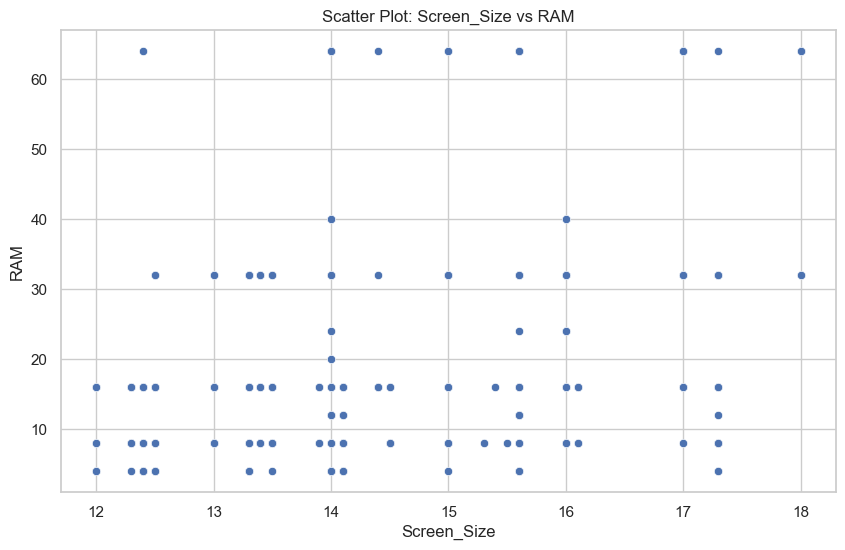


Scatter Plot between 'Screen_Size' and 'Price':


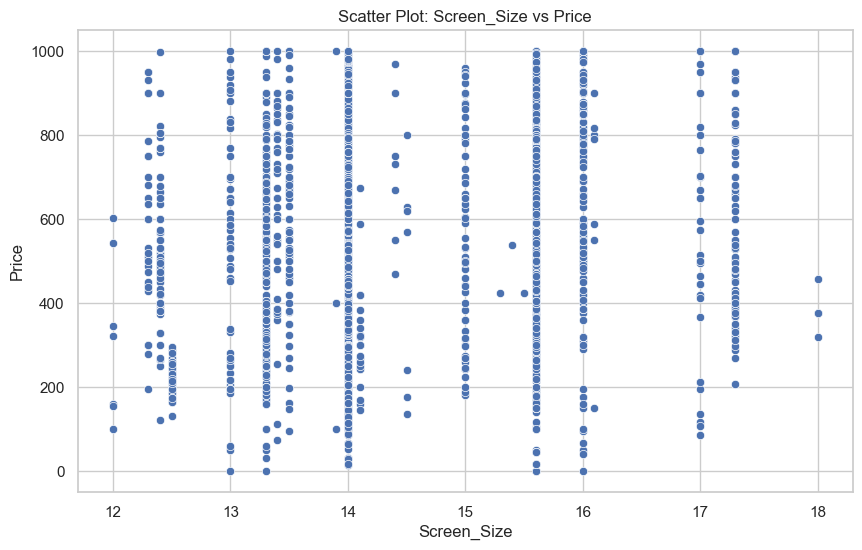


Scatter Plot between 'RAM' and 'Price':


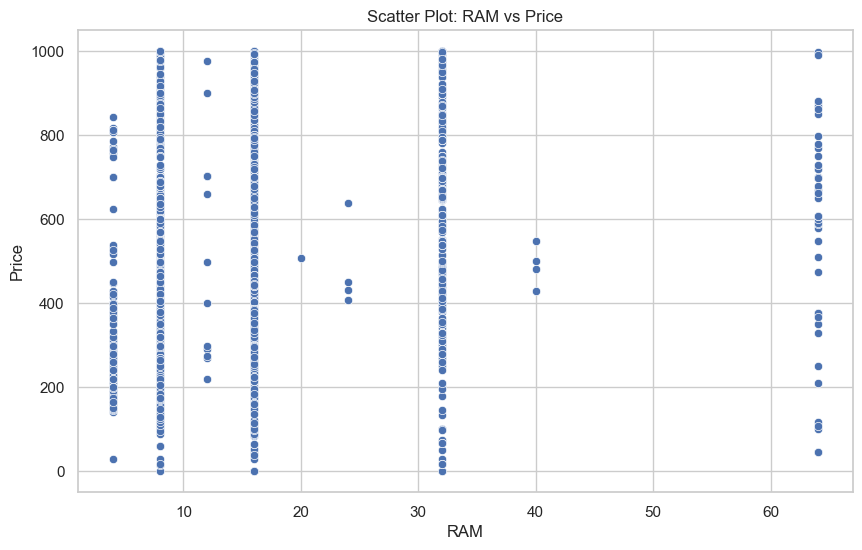


Correlation Heatmap among Numerical Features:


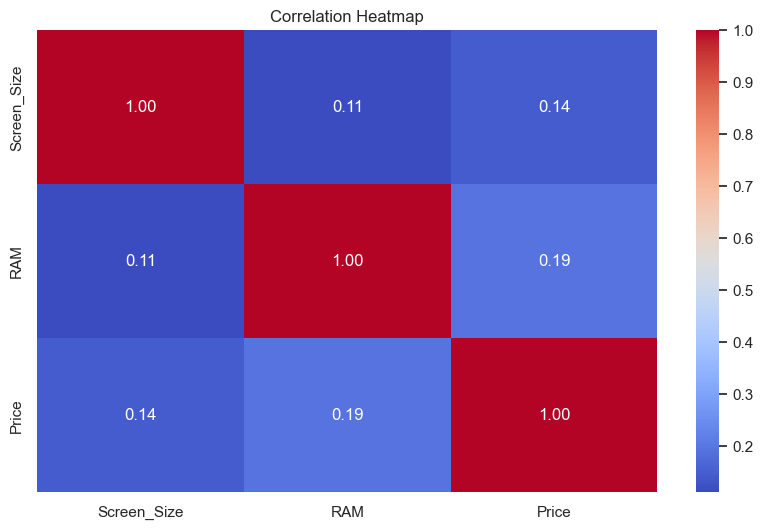

In [5]:
# Variate Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('cleaned_dataset.csv')

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("\n=== Bivariate Analysis ===")

# Numerical vs numerical: scatter plots
num_cols = df.select_dtypes(include=[np.number]).columns
for i, col1 in enumerate(num_cols):
    for col2 in num_cols[i+1:]:
        print(f"\nScatter Plot between '{col1}' and '{col2}':")
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f'Scatter Plot: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

# Correlation heatmap
print("\nCorrelation Heatmap among Numerical Features:")
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Step 4: Insights and Hypothesis Formulation

---

In this section, we will derive insights from the visualizations and propose hypotheses based on the patterns observed in the dataset.

### Insights and Observations:

1. **Most Listings Cluster Around $500**:  
   The average product price is approximately $529, with both the median and mode close to $500. This indicates a strong clustering of listings in the mid-range price segment, suggesting that around $500 is the most competitive and active price point on the platform.

2. **Dell, Lenovo, and HP Dominate the Market**:  
   The top three brands: Dell, Lenovo, and HP got the majority of the listings. These brands offer a wide spectrum of laptops across different performance tiers and price ranges, which explains their dominant presence in the marketplace.

3. **High Prevalence of Refurbished and Open-Box Products**:  
   A significant portion of the listings are categorized as open-box or refurbished (e.g., “Excellent - Refurbished,” “Very Good - Refurbished”). This highlights eBay’s strong role as a marketplace for like-new tech, having to cater budget-conscious buyers who are looking for value deals.

---

### Hypothesis Formulation:

**Hypothesis 1**:  
*Refurbished or open-box products tend to be priced significantly lower than new products, even when brand and specifications are comparable.*  
- This means that even if a refurbished or open-box laptop has the same brand, processor, RAM, and other specs as a new one, its price is usually lower. The lower price is likely due to buyers’ perception of risk (e.g., shorter warranty, past use) and sellers’ need to offer discounts to make these items attractive.

- To test this, we could compare the average prices of new and refurbished/open-box listings, making sure to group them by brand and hardware features so we're comparing similar products.
